<a href="https://colab.research.google.com/github/lukeeees/Decision-Forest/blob/main/TDecisionT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Classifier
Author: Luke Nigel Laylo
Subject: ADMN 5015 - Artificial Intelligence in Marketing


---
## Project Outline


1.   Review the Colab's code used in class (Tensorflow's Deep Neural Networks or Decision Forests).
2.   Think about a Marketing use case for a classifier.
3. Find a dataset that can be used for the Marketing classifier case that you choose.
4. Adjust the code used in class to run your dataset (make sure your dataset has features and labels).
5. Run the code and evaluate your loss and accuracy.
6. Predict three new records.
7. What would be the benefits of using this tool?  How would you communicate these benefits to a Marketing Manager?








Dataset: Shopping Campaign on Customer Classification


## Objective:
The superstore wishes to forecast the likelihood of a positive response from the consumer and determine the many aspects that influence the customer's response. Examine the data supplied to determine these elements and then create a prediction model to forecast the likelihood that a client would respond positively.

In [ ]:
# !pip install tensorflow_decision_forests --quiet

# Import Libraries

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def load_data(path):
    """
    Loads the data from the given path.
    :param path: The path to the data.
    :return: The data as a pandas DataFrame.
    """
    return pd.read_csv(path)

In [ ]:
# Download data
df= load_data("https://raw.githubusercontent.com/lukeeees/ADMN5015/main/superstore_data.csv")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


# Data Exploration

In [ ]:
# Make sure data types are correct
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
# summary of df
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# correlation
df.corr()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,-0.030128
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,-0.027225
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953


In [ ]:
# check for missing values
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# check for outliers
df.describe(include=['O'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,8/31/2012
freq,1127,864,12


# Get Training and Test Dataset

In [ ]:
label = "Response"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label]= df[label].map(classes.index)

Label classes: [1, 0]


In [ ]:
def split_dataset(data, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(data)) < test_ratio
  return data[~test_indices], data[test_indices]

In [ ]:
df_training, df_test = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(df_training), len(df_test)))

1548 examples in training, 692 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_training, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test,label=label)

# Evaluate the Model

In [ ]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(x=train_ds)

Use 2 thread(s) for training
Use /tmp/tmpvi5mnqzk as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Id': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Year_Birth': <tf.Tensor 'data_20:0' shape=(None,) dtype=int64>, 'Education': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Marital_Status': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'Income': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Kidhome': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'Teenhome': <tf.Tensor 'data_19:0' shape=(None,) dtype=int64>, 'Dt_Customer': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'Recency': <tf.Tensor 'data_18:0' shape=(None,) dtype=int64>, 'MntWines': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'MntFruits': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'MntMeatProducts': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'MntFishProducts': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'MntSweetProducts': 

[INFO 2023-01-25T03:16:08.751863957+00:00 kernel.cc:814] Start Yggdrasil model training
[INFO 2023-01-25T03:16:08.751891303+00:00 kernel.cc:815] Collect training examples
[INFO 2023-01-25T03:16:08.751974576+00:00 kernel.cc:423] Number of batches: 2
[INFO 2023-01-25T03:16:08.751986404+00:00 kernel.cc:424] Number of examples: 1548
[INFO 2023-01-25T03:16:08.75339477+00:00 data_spec_inference.cc:303] 553 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Dt_Customer (59 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2023-01-25T03:16:08.753472027+00:00 data_spec_inference.cc:303] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Marital_Status (5 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2023-01-25T03:16:08.753768004+00:00 kernel.cc:837] Training dataset:
Number of records: 1548
Number of columns: 22

Number of columns by type:
	NUMERICAL: 18 (8

Model trained in 0:00:02.475010
Compiling model...
Model compiled.


In [ ]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 875ms/step - loss: 0.0000e+00 - accuracy: 0.8627

loss: 0.0000
accuracy: 0.8627


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=5)

In [ ]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	Complain
	Dt_Customer
	Education
	Id
	Income
	Kidhome
	Marital_Status
	MntFishProducts
	MntFruits
	MntGoldProds
	MntMeatProducts
	MntSweetProducts
	MntWines
	NumCatalogPurchases
	NumDealsPurchases
	NumStorePurchases
	NumWebPurchases
	NumWebVisitsMonth
	Recency
	Teenhome
	Year_Birth

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.             "__LABEL"  8.345676 ################
    2.            "Complain"  8.342684 ###############
    3.             "Kidhome"  8.155451 ###############
    4.           "Education"  7.762247 ##############
    5.                  "Id"  7.707898 #############
    6.            "Tee

In [ ]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	Complain
	Dt_Customer
	Education
	Id
	Income
	Kidhome
	Marital_Status
	MntFishProducts
	MntFruits
	MntGoldProds
	MntMeatProducts
	MntSweetProducts
	MntWines
	NumCatalogPurchases
	NumDealsPurchases
	NumStorePurchases
	NumWebPurchases
	NumWebVisitsMonth
	Recency
	Teenhome
	Year_Birth

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.             "__LABEL"  8.345676 ################
    2.            "Complain"  8.342684 ###############
    3.             "Kidhome"  8.155451 ###############
    4.           "Education"  7.762247 ##############
    5.                  "Id"  7.707898 #############
    6.            "Tee

In [ ]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=1548, accuracy=0.8669250645994832, loss=0.3038495428422803, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

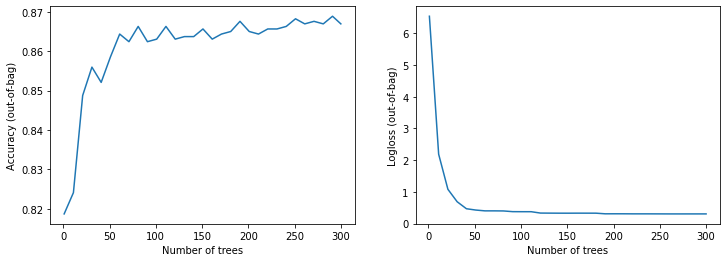

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

#Prediction

In [ ]:
df_test[:10]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,1,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,0,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,1,0
14,10311,1969,Graduation,Married,4428.0,0,1,5/10/2013,0,16,...,2,4,321,0,25,0,0,1,1,0
16,10521,1977,Graduation,Married,54809.0,1,1,11/9/2013,0,63,...,13,13,22,4,2,1,5,4,0,0
18,1473,1960,2n Cycle,Single,47823.0,0,1,7/23/2013,0,53,...,2,1,10,2,2,0,3,8,1,0
19,2795,1958,Master,Single,30523.0,2,1,1/7/2013,0,5,...,0,0,5,1,1,0,2,7,1,0
20,2285,1954,Master,Together,36634.0,0,1,5/28/2013,0,213,...,4,3,30,3,5,2,5,7,1,0


In [ ]:
# The first 3 predictions.
result_df = pd.DataFrame(model_1.predict(test_ds, verbose=0)[:3])
result_df["prediction"] = result_df[0].apply(lambda x: 1 if x >= .50 else 0)
result_df

,0,prediction
0,0.576666,1
1,0.896666,1
2,0.366666,0


In [ ]:
test = pd.DataFrame(df_test[:3]['Response'],index=None)
test

,Response
0,0
2,1
4,0


# Result
Out of the 3 samples we have it was able to correctly predict 2 out of 3 samples.

# What would be the benefits of using this tool?  
How would you communicate these benefits to a Marketing Manager?

By using this tool the Decision tree are easy to understand and interpret the result. Using decision trees can help us identify key drivers of customer behavior, which help us develop more effective marketing strategies. In this case we checked the response of the customer.

By using this method we can check who our favorable customer is by using these model.